In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 函数的上帝视角和每一处的梯度
# f(x)作为上帝视角是用不到的
def f(x):
    return x[0]**2+50*x[1]**2

def g(x):
    return np.array([2*x[0],100*x[1]])

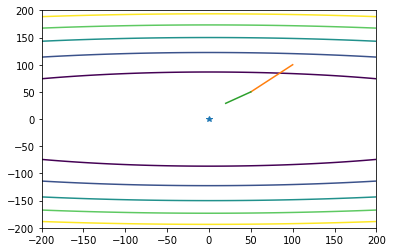

In [28]:
theta1 = np.linspace(-200,200,1000)
theta2 = np.linspace(-200,200,1000)
X,Y = np.meshgrid(theta1,theta1)
Z = X**2+20*Y**2


# 封装一下等高线图和梯度下降的线的显示
# arr中存储的是每次梯度下降以后的点的位置
def contour(X,Y,Z,arr):
    # contour是绘制等高线的
    plt.contour(X,Y,Z)
    plt.plot(0,0,marker='*')
    if arr:
        arr = np.array(arr)
        for i in range(len(arr)-1):
            plt.plot(arr[i:i+2,0],arr[i:i+2,1])
    

contour(X,Y,Z,arr=[[100,100],[50,50],[20,29]])    

## SGD

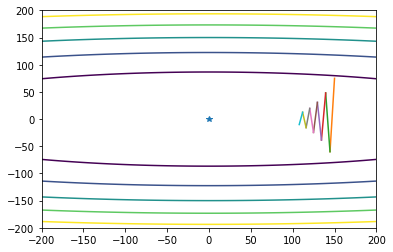

In [48]:
# 普通的gradient descent
def gd(x_start,lr,g,epoch=10,printf=True):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    for i in range(epoch-1):
        grad = g(x)
        x -= lr*grad
        
        passing_dot.append(x.copy())
        if printf:
            print('Epoch:{},grad:{},x:{}'.format(i,grad,x))
    return x,passing_dot

result,arr = gd(x_start=[150,75],lr=0.018,g=g,epoch=10,printf=False)
contour(X,Y,Z,arr)

## SGDM with momentum

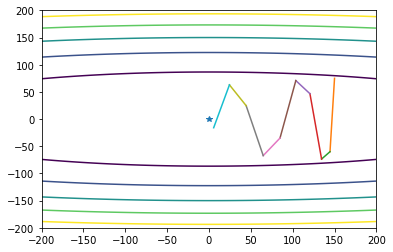

In [59]:
def gdm(x_start,lr,g,discount,epoch=10,printf=True):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(epoch-1):
        grad = g(x)
        pre_grad = pre_grad*discount+grad
        x -= lr*pre_grad
        
        passing_dot.append(x.copy())
        if printf:
            print('Epoch:{},grad:{},x:{}'.format(i,grad,x))
    return x,passing_dot

result,arr = gdm(x_start=[150,75],lr=0.018,g=g,discount=0.9,epoch=10,printf=False)
contour(X,Y,Z,arr)

# Nestorove AG

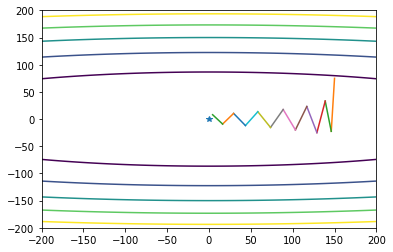

In [64]:
def NAG(x_start,lr,g,discount,epoch=10,printf=True):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(epoch-1):
        # 增加一步未来位置的梯度值
        x_future = x - lr*discount*pre_grad
        future_grad = g(x_future)
        
        pre_grad = pre_grad*discount+future_grad
        x -= lr*pre_grad
        
        passing_dot.append(x.copy())
        if printf:
            print('Epoch:{},grad:{},x:{}'.format(i,grad,x))
    return x,passing_dot

result,arr = NAG(x_start=[150,75],lr=0.013,g=g,discount=0.9,epoch=13,printf=False)
contour(X,Y,Z,arr)

## rmsprop
### 由于rmsprop是对历史梯度平方进行调整，因此衰减非常快，学习率初始值要设置的大一些

Epoch:0,grad:[ 180. 1500.],x:[90. 15.]
Epoch:1,grad:[118.03226646 317.6048662 ],x:[59.01613323  3.17604866]
Epoch:2,grad:[79.37075307 66.20828074],x:[39.68537653  0.66208281]
Epoch:3,grad:[53.84007009 13.5398708 ],x:[26.92003505  0.13539871]
Epoch:4,grad:[36.61468797  2.71471607],x:[18.30734398  0.02714716]
Epoch:5,grad:[24.89757126  0.53336092],x:[1.24487856e+01 5.33360915e-03]
Epoch:6,grad:[16.90769584  0.10263048],x:[8.45384792e+00 1.02630484e-03]
Epoch:7,grad:[11.46013752  0.01933084],x:[5.73006876e+00 1.93308396e-04]
Epoch:8,grad:[7.75092153e+00 3.56199437e-03],x:[3.87546076e+00 3.56199437e-05]


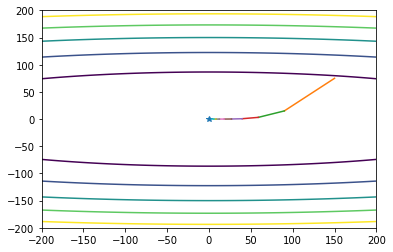

In [73]:
# rmsprop收敛是最快的
def rmsprop(x_start,lr,g,decay_rate,epoch=10,printf=True):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    cache = np.array([0,0])
    for i in range(epoch-1):
        # 记录历史梯度的平方
        cache = decay_rate*cache+(1-decay_rate)*g(x)**2
        x -= lr*g(x)/np.sqrt(cache+1e-8)
        
        passing_dot.append(x.copy())
        grad = g(x)
        if printf:
            print('Epoch:{},grad:{},x:{}'.format(i,grad,x))
    return x,passing_dot

result,arr = rmsprop(x_start=[150,75],lr=6,g=g,decay_rate=0.99,epoch=10,printf=True)
contour(X,Y,Z,arr)